Chapter 22
# Prediction Intervals

From a machine learning perspective, a prediction or forecast is a single outcome value given some input variables.  yhat is the estimated outcome or production made by the trained model for the given input data X.  By definition it is an estimate or approximation, and contains some uncertainty:
- from errors in the model itself
- from noise in the input data

The model is an approximation of the relationship between the input variables and the output variables.

Prediction intervals provide a way to quantify and communicate the uncertainty in a prediction.  They provide a probabalistic upper and lower bound on the estimate of an outcome variable.

Prediction intervals are most commonly used when making predictions or forecasts with a regressino model, where a quantity is being predicted.  An example of the presentation of a prediction intervals is:
- Given a prediction of 'y' given 'x', there is a 95% likelihood that the range 'a' to 'b' covers the true outcome

The prediction interval surrounds the prediction made by the model, and hopefully covers the range of the true outcome.

Prediction intervals are different from:
- confidence intervals which quantify the uncertainty on an estimated population parameter such as a mean or standard deviation

Prediction intervals describe the uncertainty for a single specific outcome.  A prediction interval is often larger than the confidence interval, as it must take into account:
- the confidence interval
- the variance in the output variable being predicted

A prediction interval is calculated as some combination of:
- the estimated variance of the model
- the variance of the outcome variable

Prediction intervals are easy to describe, but difficult to calculate in practice.  In simple cases like linear regression, we can estimate the prediction interval directly.

In the cases of nonlinear regression algorithms (such as artificial neural networks) it is a lot more challenging, and requires the choice and implementation of specialised techniques.  General techniques such as the bootstrap resampling method can be used, but are computationally expensive.

The following list summarises some methods that can be used for prediction uncertainty for nonlinear machine learning models:
- The Delta Method, from the field of nonlinear regression
- The Bayesian Method, from Bayesian modelling and statistics
- The Mean-Variance Estimation Method, using estimated statistics
- The Bootstrap Method, using data resampling and developing and ensemble of models

# Prediction Interval for Linear Regression
A linear regression is a model that describes the linear combination of inputs to calculate the output variables.  For example, an estimated linear regression model may be written as:
- yhat = b0 + (b1 * x)

We do not know the true values of the coefficients b0 and b1.  We also do not know the true population parameters such as mean and standard deviation for x and y.  All of these elements must be estimated, which introduces uncertainty into the use of the model in order to make predictions.

We can make some assumptions e.g. the distributions of x and y and the prediction errors made by the model (called residuals) are Gaussian

The prediction interval around yhat can be calculated as follows:
- yhat +/- z * sigma

where z is the number of standard deviations from the Gaussian distribution (e.g. 1.96 for a 95% interval) and sigma is the standard deviation of the predicted distribution.  We do not know sigma in practice: instead we can calculated an unbiased estimate of the predicted standard deviation as follows:
- stdev = sqrt((1/(n-2)) * (sum of squares of difference between yhat-i and y-i for i from 1 to n))

# Worked Example
First define a simple two-variable dataset, where the output variable (y) depends on the input variable (x) with some Gaussian noise

Next develop a simple linear regression that given the input variable x will predict the y variable.  We can use the SciPy function linregress() to fit the model and return the b0 and b1 coefficients for the model.

We can use the coefficients to calculate the predicted y values (yhat) for each of the input variables.  The resulting points will form a line that represents the learned relationship.

We are now ready to make a prediction with our simple linear regression model, and add a prediction interval.  We will take one sample from the dataset to:
- make a prediction
- calculate the prediction interval for the prediction
- compare the prediction and interval to the known expected values

Next we can estimate the standard deviation in the prediction direction.  We can calculate this directly using the NumPy arrays.

Next we can calculate the prediction interval for our chosen input.  We will use the significance level of 95%, which corresponds to 1.96 standard deviations from the Gaussian distribution.  Once the interval is calculated, we can summarise the bounds on the predictions to the user.

b0=1.011, b1=49.117
Prediction Interval: 20.204
95% likelihood that the true value is between 162.920 and 203.328
True value: 180.955


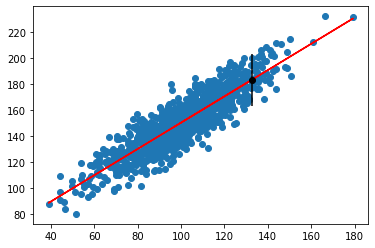

In [6]:
# generate related variables
from numpy.random import randn
from numpy.random import seed
from numpy import sqrt
from numpy import sum as arraysum
from matplotlib import pyplot as plt
from scipy.stats import linregress

# seed random number generator
seed(1)

# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)

# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0=%.3f, b1=%.3f' % (b1, b0))

# use the coefficients to make a prediction
yhat = b0 + b1 * x

# take one sample from the dataset, and define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]

# estimate standard deviation of yhat (prediction)
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)

# calculate 95% prediction interval, and corresponding lower and upper limits
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat_out - interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)

# plot data - we can see a clear linear relationship between the variables, with the spread of points highlighting the noise or random error in the relationship
plt.scatter(x, y)

# plot predictions for dataset as a red line on top of the scatterplot - we can see clearly that the model has learned the underlying relationship in the dataset
plt.plot(x, yhat, color='r')

# plot the prediction and prediction interval as a black dot and line respectively
plt.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
plt.show()

# Extensions

Summarise the difference between tolerance, confidence and prediction intervals

# Tolerance Intervals
The bounds of a proportion of a distribution, used to help identify anomalies or outliers e.g.
- the range from x to y covers 95% of the data with a confidence of 99%

# Confidence Intervals
The bounds on the estimate of a population parameter, such as mean, median or standard deviation estimated from a sample of independent observations from the population e.g.
- there is a 95% likelihood that the range from x to y covers the true statistic mean/median/stdev

# Prediction Intervals
The bounds on a single observation i.e. quantifying the uncertainty of a single predicted value e.g.
- given a prediction of y given x, there is a 95% likelihood that the range a to b covers the true outcome

In [20]:
# develop a linear regression model for a standard machine learning dataset, and calculate prediction intervals for a small test set
import pandas as pd

# import abalone data
filename = '20 abalone.csv'
data = pd.read_csv(filename)
data.corr(method='pearson').round(3)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000,0.987,0.828,0.925,0.898,0.903,0.898,0.557
Diameter,0.987,1.000,0.834,0.925,0.893,0.900,0.905,0.575
Height,0.828,0.834,1.000,0.819,0.775,0.798,0.817,0.557
Whole_weight,0.925,0.925,0.819,1.000,0.969,0.966,0.955,0.540
Shucked_weight,0.898,0.893,0.775,0.969,1.000,0.932,0.883,0.421
Viscera_weight,0.903,0.900,0.798,0.966,0.932,1.000,0.908,0.504
Shell_weight,0.898,0.905,0.817,0.955,0.883,0.908,1.000,0.628
Rings,0.557,0.575,0.557,0.540,0.421,0.504,0.628,1.000


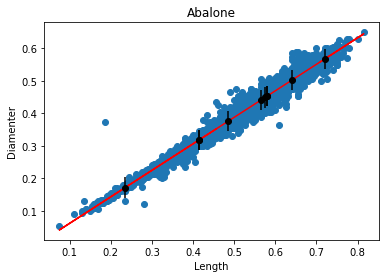

In [29]:
from numpy.random import randint
from matplotlib import pyplot as plt

# select 2 variables with a strong positive correlation
x = data['Length']
y = data['Diameter']

# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
# print('b0=%.3f, b1=%.3f' % (b1, b0))

# use the coefficients to make a prediction
yhat = b0 + b1 * x

# plot data
plt.scatter(x, y)
plt.title('Abalone')
plt.xlabel('Length')
plt.ylabel('Diamenter')

# plot predictions for dataset as a red line on top of the scatterplot
plt.plot(x, yhat, color='r')

# estimate standard deviation of yhat (prediction), and radius of 95% prediction interval
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
interval = 1.96 * stdev

# determine some random samples to extract
samples = randint(0, len(x), 10)

# for each sample, define new input, expected value and prediction
for entry in samples:
    x_in = x[entry]
    # y_out = y[entry]
    yhat_out = yhat[entry]

    # calculate lower and upper limits of prediction interval
    lower, upper = yhat_out - interval, yhat_out + interval

    # plot the prediction and prediction interval as a black dot and line respectively
    plt.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
plt.show()